In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.subplots as sp
from scipy import stats
import math


In [5]:
diab_df=pd.read_csv('/Users/vladandreichuk/Desktop/Comparative-Analysis-of-ML-Algorithms-Predicting-Hospital-Readmission-of-Diabetes-Patients/diabetic_data.csv')

## **Preliminary Feature Cleaning**

In [6]:
diab_df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [7]:
diab_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [8]:
#Since missing values are represented as ?, change them to NaN
diab_df.replace('?', np.nan, inplace=True)

In [9]:
# Prevent 'None' values being interpreted as np.nan
diab_df['A1Cresult'] = diab_df['A1Cresult'].replace(np.nan,'No')
diab_df['max_glu_serum'] = diab_df['max_glu_serum'].replace(np.nan,'No')

In [10]:
# Find columns with only one unique value
single_unique_columns = diab_df.columns[diab_df.nunique() == 1]

single_unique_columns

Index(['examide', 'citoglipton'], dtype='object')

In [11]:
# Drop irrelevant columns from the DataFrame
columns_to_drop = ['encounter_id', 'patient_nbr', 'payer_code','examide','citoglipton']
diab_df = diab_df.drop(columns_to_drop, axis=1)

In [12]:
diab_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 45 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   race                      99493 non-null   object
 1   gender                    101766 non-null  object
 2   age                       101766 non-null  object
 3   weight                    3197 non-null    object
 4   admission_type_id         101766 non-null  int64 
 5   discharge_disposition_id  101766 non-null  int64 
 6   admission_source_id       101766 non-null  int64 
 7   time_in_hospital          101766 non-null  int64 
 8   medical_specialty         51817 non-null   object
 9   num_lab_procedures        101766 non-null  int64 
 10  num_procedures            101766 non-null  int64 
 11  num_medications           101766 non-null  int64 
 12  number_outpatient         101766 non-null  int64 
 13  number_emergency          101766 non-null  int64 
 14  numb

In [13]:
#Drop 'weight' column due to largely missing values
diab_df = diab_df.drop(['weight','medical_specialty'], axis=1)

## **Missing Values**

In [14]:
diab_df.isnull().sum()

race                        2273
gender                         0
age                            0
admission_type_id              0
discharge_disposition_id       0
admission_source_id            0
time_in_hospital               0
num_lab_procedures             0
num_procedures                 0
num_medications                0
number_outpatient              0
number_emergency               0
number_inpatient               0
diag_1                        21
diag_2                       358
diag_3                      1423
number_diagnoses               0
max_glu_serum                  0
A1Cresult                      0
metformin                      0
repaglinide                    0
nateglinide                    0
chlorpropamide                 0
glimepiride                    0
acetohexamide                  0
glipizide                      0
glyburide                      0
tolbutamide                    0
pioglitazone                   0
rosiglitazone                  0
acarbose  

In [15]:
# Impute the missing values in the race column with its mode
diab_df['race'].fillna(diab_df['race'].mode()[0], inplace=True)

In [16]:
# Impute the missing values in the 'diag' columns with 'Unknown'
cols_to_impute = ['diag_1', 'diag_2', 'diag_3']
for col in cols_to_impute:
    diab_df[col].fillna('Unknown', inplace=True)

In [17]:
diab_df.isnull().sum()

race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose                    0
miglitol                    0
troglitazone                0
tolazamide

## **Duplicates**

In [18]:
diab_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 43 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   race                      101766 non-null  object
 1   gender                    101766 non-null  object
 2   age                       101766 non-null  object
 3   admission_type_id         101766 non-null  int64 
 4   discharge_disposition_id  101766 non-null  int64 
 5   admission_source_id       101766 non-null  int64 
 6   time_in_hospital          101766 non-null  int64 
 7   num_lab_procedures        101766 non-null  int64 
 8   num_procedures            101766 non-null  int64 
 9   num_medications           101766 non-null  int64 
 10  number_outpatient         101766 non-null  int64 
 11  number_emergency          101766 non-null  int64 
 12  number_inpatient          101766 non-null  int64 
 13  diag_1                    101766 non-null  object
 14  diag

In [19]:
# Check for and remove duplicate rows
diab_df.drop_duplicates(inplace=True)

In [20]:
#no duplicates where found
diab_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 43 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   race                      101766 non-null  object
 1   gender                    101766 non-null  object
 2   age                       101766 non-null  object
 3   admission_type_id         101766 non-null  int64 
 4   discharge_disposition_id  101766 non-null  int64 
 5   admission_source_id       101766 non-null  int64 
 6   time_in_hospital          101766 non-null  int64 
 7   num_lab_procedures        101766 non-null  int64 
 8   num_procedures            101766 non-null  int64 
 9   num_medications           101766 non-null  int64 
 10  number_outpatient         101766 non-null  int64 
 11  number_emergency          101766 non-null  int64 
 12  number_inpatient          101766 non-null  int64 
 13  diag_1                    101766 non-null  object
 14  diag

## **Outliers**

In [21]:
def readmitted_by_feature(metric):
    """
    This function groups the data by the specified 'metric' and 'readmitted' status, calculates the percentage of readmitted patients for each category, and creates a bar plot using Plotly Express.
    The resulting plot displays the distribution of readmission percentages across categories of the specified 'metric,' providing insights into how different factors may affect patient readmission rates.

    Parameters:
        metric (str): The name of the feature (column) used for grouping data and creating the bar plot.
    """
    # Group the data by 'metric' and 'readmitted', and calculate the count for each combination
    grouped_data = diab_df.groupby([metric, 'readmitted']).size().unstack()

    # Calculate the percentage of readmitted patients for each category
    total_counts = grouped_data.sum(axis=1)
    for col in grouped_data.columns:
        grouped_data[col] = (grouped_data[col] / total_counts) * 100

    # Calculate the sum of percentages in '<30' and '>30' categories and sort by it
    grouped_data['sum_percentages'] = grouped_data['<30'] + grouped_data['>30']
    grouped_data = grouped_data.sort_values(by='sum_percentages', ascending=True)
    grouped_data.drop(columns='sum_percentages', inplace=True)

    # Create a DataFrame for Plotly
    grouped_data_reset = grouped_data.reset_index()

    # Create the bar plot using Plotly
    fig = px.bar(grouped_data_reset, x=metric, y=['<30', '>30', 'NO'], barmode='relative',
                 labels={metric: metric, 'value': 'Percentage'},
                 color_discrete_sequence=px.colors.qualitative.Pastel,
                 title=f'Readmission Patient Percentage by {metric}')

    # Customize the plot layout
    fig.update_layout(xaxis_title=metric, yaxis_title='Percentage', legend_title_text='Readmission Category')

    # Display the plot
    fig.show()

In [22]:
def boxplot_num_vars(df, columns, names, show_percentages):
    """
    This function generates a set of subplots with boxplots for the specified columns, each subplot labeled with the provided titles.
    
    Parameters:
        df (DataFrame): The DataFrame containing the data.
        columns (list): A list of column names to create boxplots for.
        names (list): A list of titles for the boxplots.
        show_percentages (bool, optional): If True, display the percentage of outliers next to each boxplot. Default is False.
    """
    # Create subplots
    fig = sp.make_subplots(rows=2, cols=4, subplot_titles=names, vertical_spacing=0.1)

    # Create boxplots for each column
    for i, column in enumerate(columns):
        row = i // 4 + 1
        col = i % 4 + 1

        # Calculate Z-scores for the current column
        z_scores = stats.zscore(df[column])

        # Identify outliers based on Z-scores
        outliers = (z_scores > 3) | (z_scores < -3)  # You can adjust the threshold if needed

        # Compute the percentage of outliers
        percentage_outliers = (sum(outliers) / len(df)) * 100

        # Create the subtitle with or without the percentage of outliers
        if show_percentages==True:
            fig.layout.annotations[i].update(text=f'{names[i]} (Outliers: {percentage_outliers:.2f}%)')


        trace = go.Box(y=df[column], name=names[i], boxmean=True, orientation='v')
        fig.add_trace(trace, row=row, col=col)

        # Remove y-axis tick labels
        fig.update_xaxes(showticklabels=False, row=row, col=col)

    # Update layout
    fig.update_layout(
        title="Distributions of Numerical Variables",
        showlegend=False
    )

    # Show the plot
    fig.show()

In [23]:
# Define the columns of interest and corresponding names
columns_of_interest = ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications',
                        'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']
names = ['Time in Hospital (Days)', 'Lab Procedures', 'Procedures', 'Medications',
         'Outpatient Visits', 'Emergency Room Visits', 'Inpatient Visits', 'Diagnoses']

In [24]:
# Convert specified columns to 'object' type to avoid plotting them below
diab_df['admission_type_id'] = diab_df['admission_type_id'].astype('object')
diab_df['discharge_disposition_id'] = diab_df['discharge_disposition_id'].astype('object')
diab_df['admission_source_id'] = diab_df['admission_source_id'].astype('object')

In [25]:
boxplot_num_vars(diab_df, columns_of_interest, names,show_percentages=True)

In [26]:
# Specify the threshold for Z-score
threshold = 3

# Calculate Z-scores for all numerical columns
z_scores = stats.zscore(diab_df.select_dtypes(include=['number']))

# Identify outliers based on Z-scores
outliers = (z_scores > threshold).any(axis=1)

# Create the 'outliers' column in your DataFrame
diab_df['outliers'] = outliers

In [27]:
# Check how many outliers are there
diab_df['outliers'].value_counts()

outliers
False    94787
True      6979
Name: count, dtype: int64

In [28]:
readmitted_by_feature('outliers')

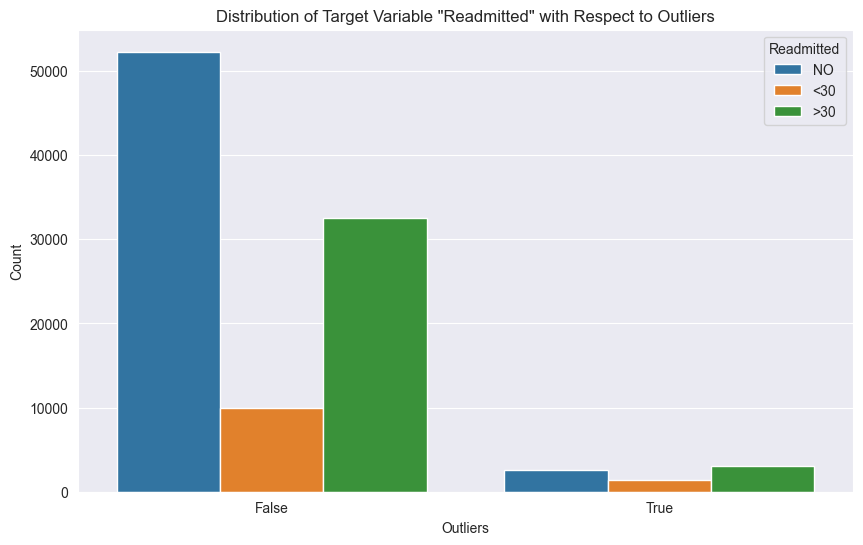

In [29]:
# Create a bar plot to visualize the distribution of 'readmitted' with respect to outliers
plt.figure(figsize=(10, 6))
sns.set_style("darkgrid")
sns.countplot(x='outliers', hue='readmitted', data=diab_df,hue_order=['NO','<30','>30'])

# Customize the plot
plt.title('Distribution of Target Variable "Readmitted" with Respect to Outliers')
plt.xlabel('Outliers')
plt.ylabel('Count')
plt.legend(title='Readmitted', loc='upper right')

# Show the plot
plt.show()

# **Feature Engineering**

In [30]:
diab_df['outpatient'] = np.where(diab_df['number_outpatient']==0,0,1)
diab_df['emergency'] = np.where(diab_df['number_emergency']==0,0,1)

In [31]:
diab_df = diab_df.drop('number_outpatient',axis=1)
diab_df = diab_df.drop('number_emergency',axis=1)

In [32]:
diab_df['number_inpatient'].value_counts(normalize = True)

number_inpatient
0     0.664564
1     0.191822
2     0.074347
3     0.033518
4     0.015939
5     0.007979
6     0.004717
7     0.002633
8     0.001484
9     0.001091
10    0.000599
11    0.000481
12    0.000334
13    0.000197
14    0.000098
15    0.000088
16    0.000059
19    0.000020
17    0.000010
21    0.000010
18    0.000010
Name: proportion, dtype: float64

In [33]:
diab_df.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,outliers,outpatient,emergency
0,Caucasian,Female,[0-10),6,25,1,1,41,0,1,...,No,No,No,No,No,No,NO,False,0,0
1,Caucasian,Female,[10-20),1,1,7,3,59,0,18,...,No,No,No,No,Ch,Yes,>30,False,0,0
2,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,...,No,No,No,No,No,Yes,NO,False,1,0
3,Caucasian,Male,[30-40),1,1,7,2,44,1,16,...,No,No,No,No,Ch,Yes,NO,False,0,0
4,Caucasian,Male,[40-50),1,1,7,1,51,0,8,...,No,No,No,No,Ch,Yes,NO,False,0,0


In [34]:
diab_df.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,outliers,outpatient,emergency
0,Caucasian,Female,[0-10),6,25,1,1,41,0,1,...,No,No,No,No,No,No,NO,False,0,0
1,Caucasian,Female,[10-20),1,1,7,3,59,0,18,...,No,No,No,No,Ch,Yes,>30,False,0,0
2,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,...,No,No,No,No,No,Yes,NO,False,1,0
3,Caucasian,Male,[30-40),1,1,7,2,44,1,16,...,No,No,No,No,Ch,Yes,NO,False,0,0
4,Caucasian,Male,[40-50),1,1,7,1,51,0,8,...,No,No,No,No,Ch,Yes,NO,False,0,0


In [35]:
# Save the cleaned data
diab_df.to_csv('diab_df_cleaned.csv', index=False) 